# Conflict and Terrorism rates analysis

# Overview

In [ ]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import geopandas as gpd
import plotly.express as px
import plotly.graph_objects as go
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the datasets
df = pd.read_csv('Conflict_and_Terrorism_deaths.csv')
df

,Entity,Year,Terrorism (deaths),Conflict (deaths),Terrorism (percent),Conflict (percent)
0,Afghanistan,1990,12,1508,0.007,0.932
1,Afghanistan,1991,68,3498,0.040,2.044
2,Afghanistan,1992,49,4341,0.027,2.408
3,Afghanistan,1994,22,9090,0.010,4.296
4,Afghanistan,1995,5,5639,0.002,2.557
...,...,...,...,...,...,...
4753,Zimbabwe,2012,0,0,0.000,0.000
4754,Zimbabwe,2013,1,0,0.001,0.000
4755,Zimbabwe,2014,0,0,0.000,0.000
4756,Zimbabwe,2015,0,0,0.000,0.000


In [ ]:
# Open and read the JSON file
with open('datapackage(1).json') as f:
    data = json.load(f)
data

{'name': 'Conflict and Terrorism deaths - OWID based on IHME & GTD',
 'title': 'Conflict and Terrorism deaths - OWID based on IHME & GTD',
 'id': 2400,
 'description': "Data for conflict and terrorism deaths has been differentiated by Our World in Data based on published figures by the IHME, Global Burden of Disease (GBD), and Global Terrorism Database (GTD).\n\nThe IHME, GBD report combined deaths from 'Conflict and Terrorism'. To differentiate 'conflict' deaths, we have subtracted number of terrorism deaths published by the GTD from this combined metric of 'Conflict and Terrorism'. \n\nWe have also calculated both of these individual parameters in terms of the percentage of total deaths, by dividing by IHME figures of deaths for 'All causes'.\n\nNote that in some cases, estimates of homicide, conflict and terrorism can be challenging to differentiate, with different estimates from different sources and definitions. For terrorism, we have used data from the GTD; full data and definiti

# Data understanding

In [ ]:
# preview first 5 rows
df.head()

,Entity,Year,Terrorism (deaths),Conflict (deaths),Terrorism (percent),Conflict (percent)
0,Afghanistan,1990,12,1508,0.007,0.932
1,Afghanistan,1991,68,3498,0.040,2.044
2,Afghanistan,1992,49,4341,0.027,2.408
3,Afghanistan,1994,22,9090,0.010,4.296
4,Afghanistan,1995,5,5639,0.002,2.557


In [ ]:
# preview last 5 rows
df.tail()

,Entity,Year,Terrorism (deaths),Conflict (deaths),Terrorism (percent),Conflict (percent)
4753,Zimbabwe,2012,0,0,0.000,0.0
4754,Zimbabwe,2013,1,0,0.001,0.0
4755,Zimbabwe,2014,0,0,0.000,0.0
4756,Zimbabwe,2015,0,0,0.000,0.0
4757,Zimbabwe,2016,0,0,0.000,0.0


In [ ]:
# concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758 entries, 0 to 4757
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               4758 non-null   object 
 1   Year                 4758 non-null   int64  
 2   Terrorism (deaths)   4758 non-null   int64  
 3   Conflict (deaths)    4758 non-null   int64  
 4   Terrorism (percent)  4758 non-null   float64
 5   Conflict (percent)   4758 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 223.2+ KB


* All columns have 4758 non-null values, indicating that there are no missing values in the dataset.



In [ ]:
# check for missing values
df.isna().sum()

Entity                 0
Year                   0
Terrorism (deaths)     0
Conflict (deaths)      0
Terrorism (percent)    0
Conflict (percent)     0
dtype: int64

In [ ]:
# check for unique values in the year column
df['Year'].unique()

array([1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

* The dataset covers the years 1990 through 2016, excluding the year 1993, which is not included in the dataset.

In [ ]:
# check unique values in the entity column
df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Central Asia', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czech Republic', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Asia', 'Eastern Europe', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Hond

Observation:
* The 'Entity' column contains a combination of individual countries and regions such as Central Asia, Eastern Europe, East Asia, Oceania, South Asia, South East Asia, Su-Saharan Africa, Western Europe and World.

# Data preparation

To facilitate more focused analysis, this section prepares the data by:
* Excluding the regional categories listed in the 'Entity' column
* Creating new regional categories based on continents

In [ ]:
# Filter out rows with the specified entities from the dataframe
df = df[~df['Entity'].isin(['Central Asia', 'East Asia', 'Eastern Europe', 'North America', 'Oceania', 'South Asia', 'Southeast Asia', 'Sub-Saharan Africa', 'Western Europe', 'World'])]

In [ ]:
# confirm countries in 'Entity' column after dropping regions
df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'Iceland', 'India', 'Indonesi

In [ ]:
# Define dictionaries to map countries to continents
continent_mapping = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Democratic Republic of Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'East Timor', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'North Korea', 'South Korea', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']
}

# Create a new column 'Continent' based on the mapping
for continent, countries in continent_mapping.items():
    df.loc[df['Entity'].isin(countries), 'Continent'] = continent


# EDA

## Univariate analysis

This section analyzes the statistical summaries of the merged dataset. This involves examining key measures such as the mean, standard deviation, minimum, maximum, and the percetiles of the dataframe.

In [ ]:
# summary statistics of the dataset
df.drop('Year', axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Terrorism (deaths),4498.0,68.327257,463.169783,0.0,0.0,0.0,4.000,13079.000
Conflict (deaths),4498.0,482.841040,7938.650683,0.0,0.0,0.0,16.750,502347.000
Terrorism (percent),4498.0,0.038792,0.235723,0.0,0.0,0.0,0.003,5.877
Conflict (percent),4498.0,0.301933,2.464350,0.0,0.0,0.0,0.013,82.317


* The average deaths from terrorism and conflict are approximately 68.33 deaths and 482.84 deaths, respectively, while the average terrorism and conflict rates are approximately 0.0388 (or 3.88%) and 0.3019 (or 30.19%), respectively. These figures indicate a higher prevalence of conflict-related incidents compared to terrorism cases across the countries included in the dataset.

## Bivariate analysis

Following the categorization of countries based on their continents, we proceed to visualize the deaths from and rates of conflict and terrorism within each country.

### Africa

#### Overall trend in conflict and terrorism rates in Africa

In [ ]:
# Group data by year and calculate mean conflict and terrorism rates for Africa
df_africa = df[df['Continent'] == 'Africa']
conflict_and_terrorism_africa = df_africa.groupby('Year').mean(numeric_only=True)

# Plot
fig = px.line(conflict_and_terrorism_africa, x=conflict_and_terrorism_africa.index, y=['Conflict (percent)', 'Terrorism (percent)'],
              labels={'value': 'Rate', 'Year': 'Year'},
              title='Conflict and Terrorism Rates in Africa')

fig.update_layout(xaxis_title='Year', yaxis_title='Rate', legend_title='Category')
fig.show()

* The graph exhibits notable fluctuations in both conflict and terrorism rates in Africa, characterized by peaks and valleys.
* There are three distinct peaks in the conflict rate, occurring around the early 1990s, late 1990s, and 2010-2012. The highest peak is observed in the early 1990s, indicating a period of heightened conflict during that time. After the initial peak, the conflict rate subsides but experiences smaller peaks and valleys over the years.
* In contrast, the terrorism rate maintains a relatively low trajectory throughout the analyzed period, with minor peaks aligning roughly with the peaks in the conflict rate. However, the magnitude of the peaks in the terrorism rate is much lower than those of the conflict rate.

#### Conflict-related deaths by country

In [ ]:
# Plot box plot for conflict-related deaths
fig = px.box(df_africa, x='Entity', y='Conflict (deaths)', color='Entity', title='Conflict-related Deaths by Country (Africa)')

fig.update_layout(xaxis_title='Country', yaxis_title='Conflict (deaths)')
fig.show()


* The boxplot prominently highlights Rwanda as having the highest number of conflict-related deaths, exceeding 500,000 casualties, likely attributed to the devastating genocide that occurred in the 1990s.
* Conversely, the majority of other countries exhibit substantially lower conflict death tolls, with many clustered around or below 100,000 deaths. Noteworthy exceptions include the Democratic Republic of Congo, Ethiopia, and Libya, which show relatively higher conflict death tolls compared to the average, albeit still lower than Rwanda's staggering figure.

#### Terrorism-related deaths by country

In [ ]:
# Plot box plot for terrorism-related deaths
fig = px.box(df_africa, x='Entity', y='Terrorism (deaths)',
             color='Entity', title='Terrorism-related Deaths by Country (Africa)')

fig.update_layout(xaxis_title='Country', yaxis_title='Terrorism (deaths)')
fig.show()

* Nigeria exhibits the highest terrorism-related death toll at around 8,000, potentially due to the insurgence of Boko Haram whose actions, including bombings and attacks on civilians, may have significantly impacted Nigeria's terrorism death toll compared to other countries in the region.
* Algeria also has a relatively high death toll at around 4,000.
* Most other countries have lower terrorism death tolls, with many below 1,000 deaths, reflecting a general trend of lower terrorism-related casualties compared to conflict-related ones. However, countries like Somalia, Rwanda, and Burundi have relatively higher terrorism death tolls compared to others in the region, although still lower than Nigeria. This can be attributed to the activities of militia and extremist groups in these areas.

#### Year by year analysis

In [ ]:
# Iterate through each year from 1990 to 2016
for year in range(1990, 2017):
    # Filter data for the current year
    df_year = df_africa[df_africa['Year'] == year]

    # Create an empty figure
    fig = go.Figure()

    # Add bar trace for the current year to the figure
    fig.add_trace(go.Bar(
        x=df_year['Entity'],
        y=df_year['Conflict (deaths)'],
        name=f'Conflict Deaths - {year}'
    ))

    # Add bar trace for the current year to the figure
    fig.add_trace(go.Bar(
        x=df_year['Entity'],
        y=df_year['Terrorism (deaths)'],
        name=f'Terrorism Deaths - {year}'
    ))

    # Update layout and display the plot
    fig.update_layout(
        title={
            'text': f'Conflict and Terrorism Deaths (Africa) - {year}',
            'x': 0.5,
            'xanchor': 'center'
        },
        xaxis_title='Country',
        yaxis_title='Number of Deaths',
        xaxis_tickangle=-90,
        barmode='group',
        font=dict(size=14),
        width = 1200,
        height = 700
    )

    fig.show()

In [ ]:
# Plot bubble chart
fig = px.scatter(df_africa, x='Conflict (deaths)', y='Terrorism (deaths)', size='Conflict (deaths)', color='Entity', hover_name='Entity',
                 log_x=True, size_max=90, title='Conflict vs Terrorism Deaths by Country (Africa)')

fig.update_layout(xaxis_title='Conflict (deaths)', yaxis_title='Terrorism (deaths)')
fig.show()

(-21.06298832501519, 54.57181563452453, -38.42762439346823, 40.95845245011106)

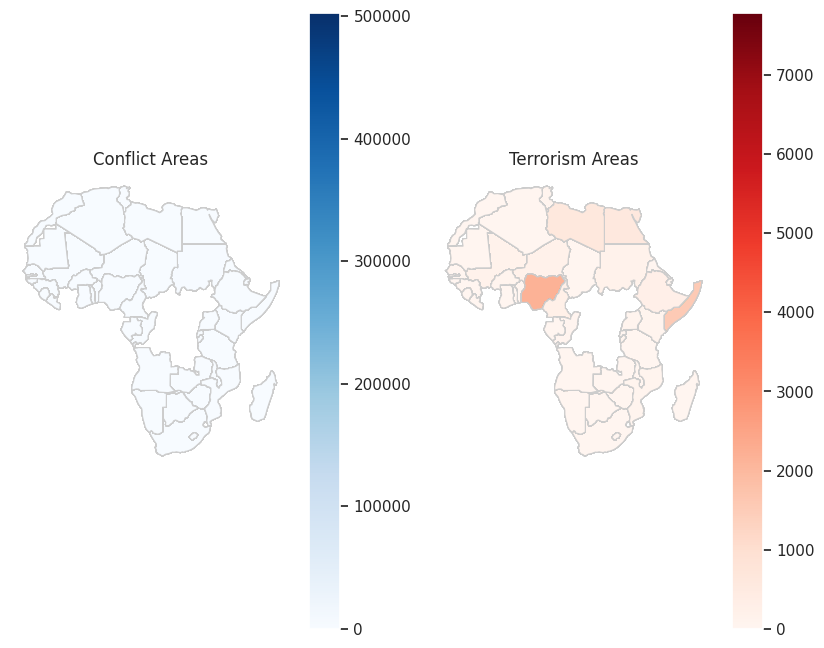

In [ ]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with the world map data
world = world.merge(df_africa, left_on='name', right_on='Entity', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# Plot conflict areas
world.plot(column='Conflict (deaths)', cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)
ax[0].set_title('Conflict Areas')
ax[0].axis('off')

# Plot terrorism areas
world.plot(column='Terrorism (deaths)', cmap='Reds', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
ax[1].set_title('Terrorism Areas')
ax[1].axis('off')

### Asia

#### Overall trend in conflict and terrorism rates in Asia

In [ ]:
# Group data by year and calculate mean conflict and terrorism rates for Asia
df_asia = df[df['Continent'] == 'Asia']
conflict_and_terrorism_asia = df_asia.groupby('Year').mean(numeric_only=True)

# Plot both trend lines on the same graph
fig = px.line(conflict_and_terrorism_asia, x=conflict_and_terrorism_asia.index, y=['Conflict (percent)', 'Terrorism (percent)'],
              labels={'value': 'Rate', 'Year': 'Year'},
              title='Conflict and Terrorism Rates in Asia')

fig.update_layout(xaxis_title='Year', yaxis_title='Rate', legend_title='Category')
fig.show()

#### Conflict-related deaths by country

In [ ]:
# Plot box plot for conflict-related deaths
fig = px.box(df_asia, x='Entity', y='Conflict (deaths)', color='Entity', title='Conflict-related Deaths by Country (Asia)')

fig.update_layout(xaxis_title='Country', yaxis_title='Conflict (deaths)')
fig.show()

#### Terrorism-related deaths by country

In [ ]:
# Plot box plot for terrorism-related deaths
fig = px.box(df_asia, x='Entity', y='Terrorism (deaths)',
             color='Entity', title='Terrorism-related Deaths by Country (Asia)')

fig.update_layout(xaxis_title='Country', yaxis_title='Terrorism (deaths)')
fig.show()

#### Year by year analysis

In [ ]:
# Iterate through each year from 1990 to 2016
for year in range(1990, 2017):
    # Filter data for the current year
    df_year = df_asia[df_asia['Year'] == year]

    # Create an empty figure
    fig = go.Figure()

    # Add bar trace for the current year to the figure
    fig.add_trace(go.Bar(
        x=df_year['Entity'],
        y=df_year['Conflict (deaths)'],
        name=f'Conflict Deaths - {year}'
    ))

    # Add bar trace for the current year to the figure
    fig.add_trace(go.Bar(
        x=df_year['Entity'],
        y=df_year['Terrorism (deaths)'],
        name=f'Terrorism Deaths - {year}'
    ))

    # Update layout and display the plot
    fig.update_layout(
        title={
            'text': f'Conflict and Terrorism Deaths (Asia) - {year}',
            'x': 0.5,
            'xanchor': 'center'
        },
        xaxis_title='Country',
        yaxis_title='Number of Deaths',
        xaxis_tickangle=-90,
        barmode='group',
        font=dict(size=14),
        width = 1200,
        height = 700
    )

    fig.show()

In [ ]:
# Plot bubble chart
fig = px.scatter(df_asia, x='Conflict (percent)', y='Terrorism (percent)', size='Conflict (percent)', color='Entity', hover_name='Entity',
                 log_x=True, size_max=90, title='Conflict vs Terrorism Deaths by Country (Asia)')

fig.update_layout(xaxis_title='Conflict (percent)', yaxis_title='Terrorism (percent)')
fig.show()

(20.068361972746064, 151.5181265403292, -13.647249362851529, 58.67251203066711)

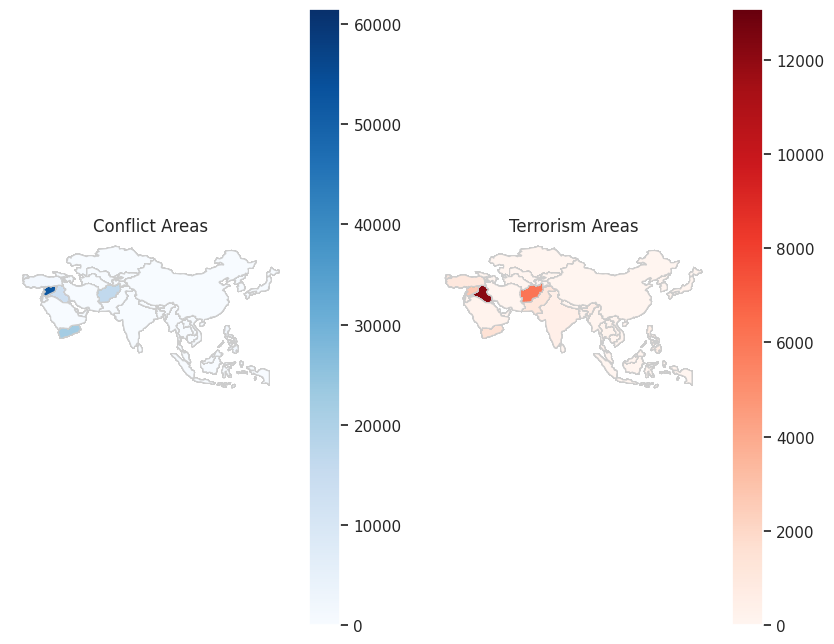

In [ ]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with the world map data
world = world.merge(df_asia, left_on='name', right_on='Entity', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# Plot conflict areas
world.plot(column='Conflict (deaths)', cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)
ax[0].set_title('Conflict Areas')
ax[0].axis('off')

# Plot terrorism areas
world.plot(column='Terrorism (deaths)', cmap='Reds', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
ax[1].set_title('Terrorism Areas')
ax[1].axis('off')

### Europe

#### Overall trend in conflict and terrorism rates in Europe

In [ ]:
# Group data by year and calculate mean conflict and terrorism rates for Europe
df_europe = df[df['Continent'] == 'Europe']
conflict_and_terrorism_europe = df_europe.groupby('Year').mean(numeric_only=True)


# Plot both trend lines on the same graph
fig = px.line(conflict_and_terrorism_europe, x=conflict_and_terrorism_europe.index, y=['Conflict (percent)', 'Terrorism (percent)'],
              labels={'value': 'Rate', 'Year': 'Year'},
              title='Conflict and Terrorism Rates in Europe')

fig.update_layout(xaxis_title='Year', yaxis_title='Rate', legend_title='Category')
fig.show()

#### Conflict-related deaths by country

In [ ]:
# Plot box plot for conflict-related deaths
fig = px.box(df_europe, x='Entity', y='Conflict (deaths)', color='Entity', title='Conflict-related Deaths by Country (Europe)')

fig.update_layout(xaxis_title='Country', yaxis_title='Conflict (deaths)')
fig.show()

#### Terrorism-related deaths by country

In [ ]:
# Plot box plot for terrorism-related deaths
fig = px.box(df_europe, x='Entity', y='Terrorism (deaths)',
             color='Entity', title='Terrorism-related Deaths by Country (Europe)')

fig.update_layout(xaxis_title='Country', yaxis_title='Terrorism (deaths)')
fig.show()

#### Year by year analysis

In [ ]:
# Iterate through each year from 1990 to 2016
for year in range(1990, 2017):
    # Filter data for the current year
    df_year = df_europe[df_europe['Year'] == year]

    # Create an empty figure
    fig = go.Figure()

    # Add bar trace for the current year to the figure
    fig.add_trace(go.Bar(
        x=df_year['Entity'],
        y=df_year['Conflict (deaths)'],
        name=f'Conflict Deaths - {year}'
    ))

    # Add bar trace for the current year to the figure
    fig.add_trace(go.Bar(
        x=df_year['Entity'],
        y=df_year['Terrorism (deaths)'],
        name=f'Terrorism Deaths - {year}'
    ))

    # Update layout and display the plot
    fig.update_layout(
        title={
            'text': f'Conflict and Terrorism Deaths (Europe) - {year}',
            'x': 0.5,
            'xanchor': 'center'
        },
        xaxis_title='Country',
        yaxis_title='Number of Deaths',
        xaxis_tickangle=-90,
        barmode='group',
        font=dict(size=14),
        width = 1200,
        height = 700
    )

    fig.show()

In [ ]:
# Plot bubble chart
fig = px.scatter(df_europe, x='Conflict (percent)', y='Terrorism (percent)', size='Conflict (percent)', color='Entity', hover_name='Entity',
                 log_x=True, size_max=90, title='Conflict vs Terrorism Deaths by Country (Europe)')

fig.update_layout(xaxis_title='Conflict (percent)', yaxis_title='Terrorism (percent)')
fig.show()

(-198.0, 198.00000000000006, -1.9064613536332207, 85.2102505406492)

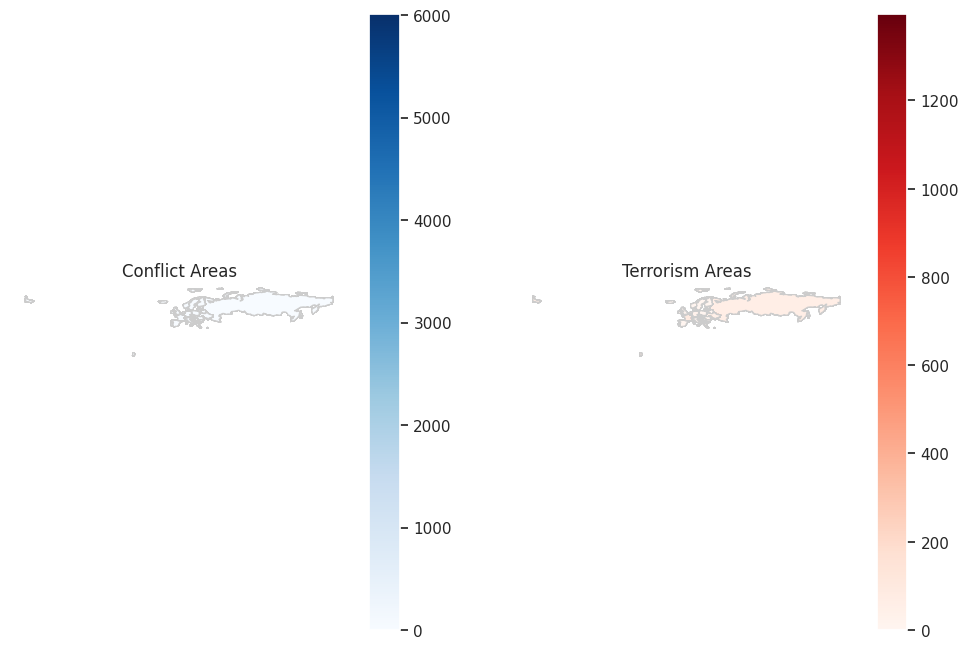

In [ ]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with the world map data
world = world.merge(df_europe, left_on='name', right_on='Entity', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Plot conflict areas
world.plot(column='Conflict (deaths)', cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)
ax[0].set_title('Conflict Areas')
ax[0].axis('off')

# Plot terrorism areas
world.plot(column='Terrorism (deaths)', cmap='Reds', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
ax[1].set_title('Terrorism Areas')
ax[1].axis('off')

### North America

#### Overall trend in conflict and terrorism rates in North America

In [ ]:
# Group data by year and calculate mean conflict and terrorism rates for North America
df_north_america = df[df['Continent'] == 'North America']
conflict_and_terrorism_north_america = df_north_america.groupby('Year').mean(numeric_only=True)


# Plot both trend lines on the same graph
fig = px.line(conflict_and_terrorism_north_america, x=conflict_and_terrorism_north_america.index, y=['Conflict (percent)', 'Terrorism (percent)'],
              labels={'value': 'Rate', 'Year': 'Year'},
              title='Conflict and Terrorism Rates in North America')

fig.update_layout(xaxis_title='Year', yaxis_title='Rate', legend_title='Category')
fig.show()

#### Conflict-related deaths by country

In [ ]:
# Plot box plot for conflict-related deaths
fig = px.box(df_north_america, x='Entity', y='Conflict (deaths)', color='Entity', title='Conflict-related Deaths by Country (North America)')

fig.update_layout(xaxis_title='Country', yaxis_title='Conflict (deaths)')
fig.show()

#### Terrorism-related deaths by country

In [ ]:
# Plot box plot for terrorism-related deaths
fig = px.box(df_north_america, x='Entity', y='Terrorism (deaths)',
             color='Entity', title='Terrorism-related Deaths by Country (North America)')

fig.update_layout(xaxis_title='Country', yaxis_title='Terrorism (deaths)')
fig.show()

#### Year by year analysis

In [ ]:
# Iterate through each year from 1990 to 2016
for year in range(1990, 2017):
    # Filter data for the current year
    df_year = df_north_america[df_north_america['Year'] == year]

    # Create an empty figure
    fig = go.Figure()

    # Add bar trace for the current year to the figure
    fig.add_trace(go.Bar(
        x=df_year['Entity'],
        y=df_year['Conflict (deaths)'],
        name=f'Conflict Deaths - {year}'
    ))

    # Add bar trace for the current year to the figure
    fig.add_trace(go.Bar(
        x=df_year['Entity'],
        y=df_year['Terrorism (deaths)'],
        name=f'Terrorism Deaths - {year}'
    ))

    # Update layout and display the plot
    fig.update_layout(
        title={
            'text': f'Conflict and Terrorism Deaths (North America) - {year}',
            'x': 0.5,
            'xanchor': 'center'
        },
        xaxis_title='Country',
        yaxis_title='Number of Deaths',
        xaxis_tickangle=-90,
        barmode='group',
        font=dict(size=14),
        width = 1200,
        height = 700
    )

    fig.show()

In [ ]:
# Plot bubble chart
fig = px.scatter(df_north_america, x='Conflict (percent)', y='Terrorism (percent)', size='Conflict (percent)', color='Entity', hover_name='Entity',
                 log_x=True, size_max=90, title='Conflict vs Terrorism Deaths by Country (North America)')

fig.update_layout(xaxis_title='Conflict (percent)', yaxis_title='Terrorism (percent)')
fig.show()

(-145.4152640639548, -48.23061465694942, 3.4199065646013627, 87.03387492549518)

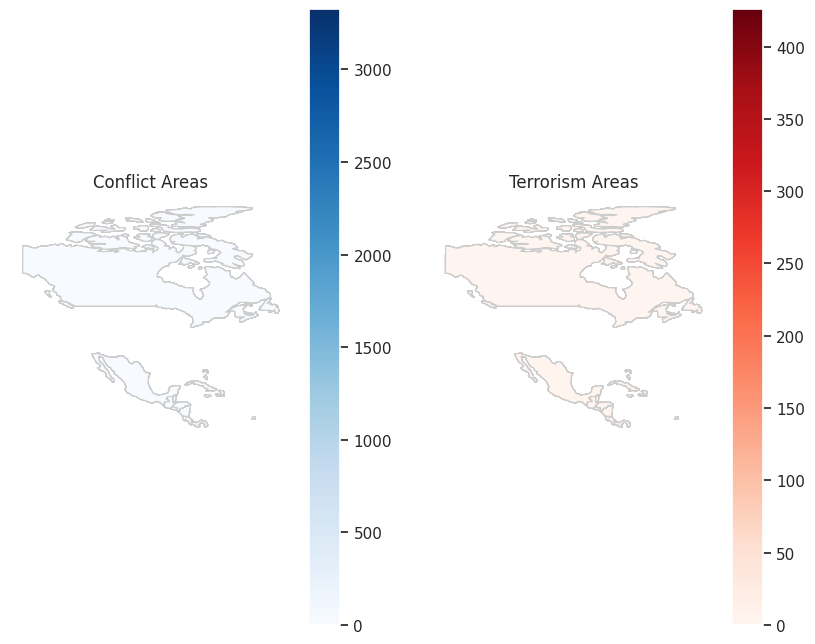

In [ ]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with the world map data
world = world.merge(df_north_america, left_on='name', right_on='Entity', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 2, figsize=(10, 8))

# Plot conflict areas
world.plot(column='Conflict (deaths)', cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)
ax[0].set_title('Conflict Areas')
ax[0].axis('off')

# Plot terrorism areas
world.plot(column='Terrorism (deaths)', cmap='Reds', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
ax[1].set_title('Terrorism Areas')
ax[1].axis('off')

### Oceania

#### Overall trend in conflict and terrorism rates in Oceania

In [ ]:
# Group data by year and calculate mean conflict and terrorism rates for Oceania
df_oceania = df[df['Continent'] == 'Oceania']
conflict_and_terrorism_oceania = df_oceania.groupby('Year').mean(numeric_only=True)


# Plot both trend lines on the same graph
fig = px.line(conflict_and_terrorism_oceania, x=conflict_and_terrorism_oceania.index, y=['Conflict (percent)', 'Terrorism (percent)'],
              labels={'value': 'Rate', 'Year': 'Year'},
              title='Conflict and Terrorism Rates in Oceania')

fig.update_layout(xaxis_title='Year', yaxis_title='Rate', legend_title='Category')
fig.show()

#### Conflict-related deaths by country

In [ ]:
# Plot box plot for conflict-related deaths
fig = px.box(df_oceania, x='Entity', y='Conflict (deaths)', color='Entity',
             title='Conflict-related Deaths by Country (Oceania)')

fig.update_layout(xaxis_title='Country', yaxis_title='Conflict (deaths)')
fig.show()

#### Terrorism-related deaths by country

In [ ]:
# Plot box plot for terrorism-related deaths
fig = px.box(df_oceania, x='Entity', y='Terrorism (deaths)',
             color='Entity', title='Terrorism-related Deaths by Country (Oceania)')

fig.update_layout(xaxis_title='Country', yaxis_title='Terrorism (deaths)')
fig.show()

#### Year by year analysis

In [ ]:
# Iterate through each year from 1990 to 2016
for year in range(1990, 2017):
    # Filter data for the current year
    df_year = df_oceania[df_oceania['Year'] == year]

    # Create an empty figure
    fig = go.Figure()

    # Add bar trace for the current year to the figure
    fig.add_trace(go.Bar(
        x=df_year['Entity'],
        y=df_year['Conflict (deaths)'],
        name=f'Conflict Deaths - {year}'
    ))

    # Add bar trace for the current year to the figure
    fig.add_trace(go.Bar(
        x=df_year['Entity'],
        y=df_year['Terrorism (deaths)'],
        name=f'Terrorism Deaths - {year}'
    ))

    # Update layout and display the plot
    fig.update_layout(
        title={
            'text': f'Conflict and Terrorism Deaths (Oceania) - {year}',
            'x': 0.5,
            'xanchor': 'center'
        },
        xaxis_title='Country',
        yaxis_title='Number of Deaths',
        xaxis_tickangle=-90,
        barmode='group',
        font=dict(size=14),
        width = 1200,
        height = 700
    )

    fig.show()

In [ ]:
# Plot bubble chart
fig = px.scatter(df_oceania, x='Conflict (percent)', y='Terrorism (percent)', size='Conflict (percent)', color='Entity', hover_name='Entity',
                 log_x=True, size_max=90, title='Conflict vs Terrorism Deaths by Country (Oceania)')

fig.update_layout(xaxis_title='Conflict (percent)', yaxis_title='Terrorism (percent)')
fig.show()

(-198.0, 198.0, -48.84829711282957, -0.2929404638723132)

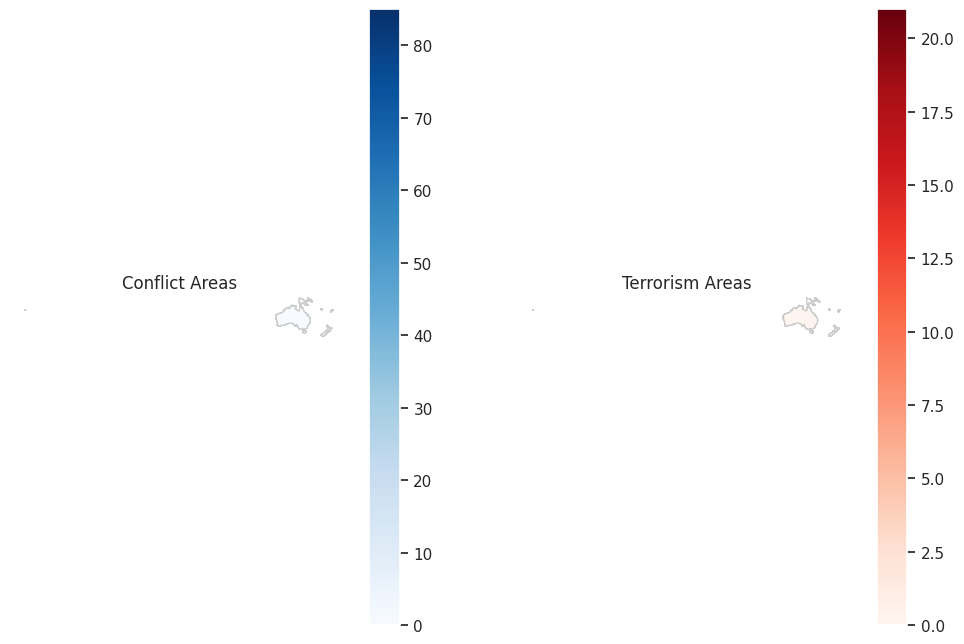

In [ ]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge with the world map data
world = world.merge(df_oceania, left_on='name', right_on='Entity', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

# Plot conflict areas
world.plot(column='Conflict (deaths)', cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)
ax[0].set_title('Conflict Areas')
ax[0].axis('off')

# Plot terrorism areas
world.plot(column='Terrorism (deaths)', cmap='Reds', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
ax[1].set_title('Terrorism Areas')
ax[1].axis('off')

### World

#### Overall trend in conflict and terrorism deaths across the world

In [ ]:
# Calculate aggregated rates for each continent
continent_agg = df.groupby('Continent').agg({
    'Conflict (deaths)': 'mean',
    'Terrorism (deaths)': 'mean',
    'Conflict (percent)': 'mean',
    'Terrorism (percent)': 'mean'
}).reset_index()

print(continent_agg)

       Continent  Conflict (deaths)  Terrorism (deaths)  Conflict (percent)  \
0         Africa         906.202308           62.652308            0.462172   
1           Asia         782.035839          173.666958            0.597413   
2         Europe          55.473684            8.643725            0.044327   
3  North America          52.250000           11.217308            0.036637   
4        Oceania           2.551282            0.576923            0.005096   

   Terrorism (percent)  
0             0.041358  
1             0.090830  
2             0.002249  
3             0.010656  
4             0.002603  


In [ ]:
# plot bar plots for conflict and terrorism deaths in the continents

fig = go.Figure()

# Add traces for conflict and terrorism rates
fig.add_trace(go.Bar(
    x=continent_agg['Continent'],
    y=continent_agg['Conflict (deaths)'],
    name='Conflict-related Deaths',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=continent_agg['Continent'],
    y=continent_agg['Terrorism (deaths)'],
    name='Terrorism-related Deaths',
    marker_color='Red'
))

# Update layout
fig.update_layout(barmode='group')

# Update title and axis labels
fig.update_layout(
    title='Conflict and Terrorism Deaths by Continent',
    xaxis_title='Continent',
    yaxis_title='Deaths'
)

# Show the plot
fig.show()


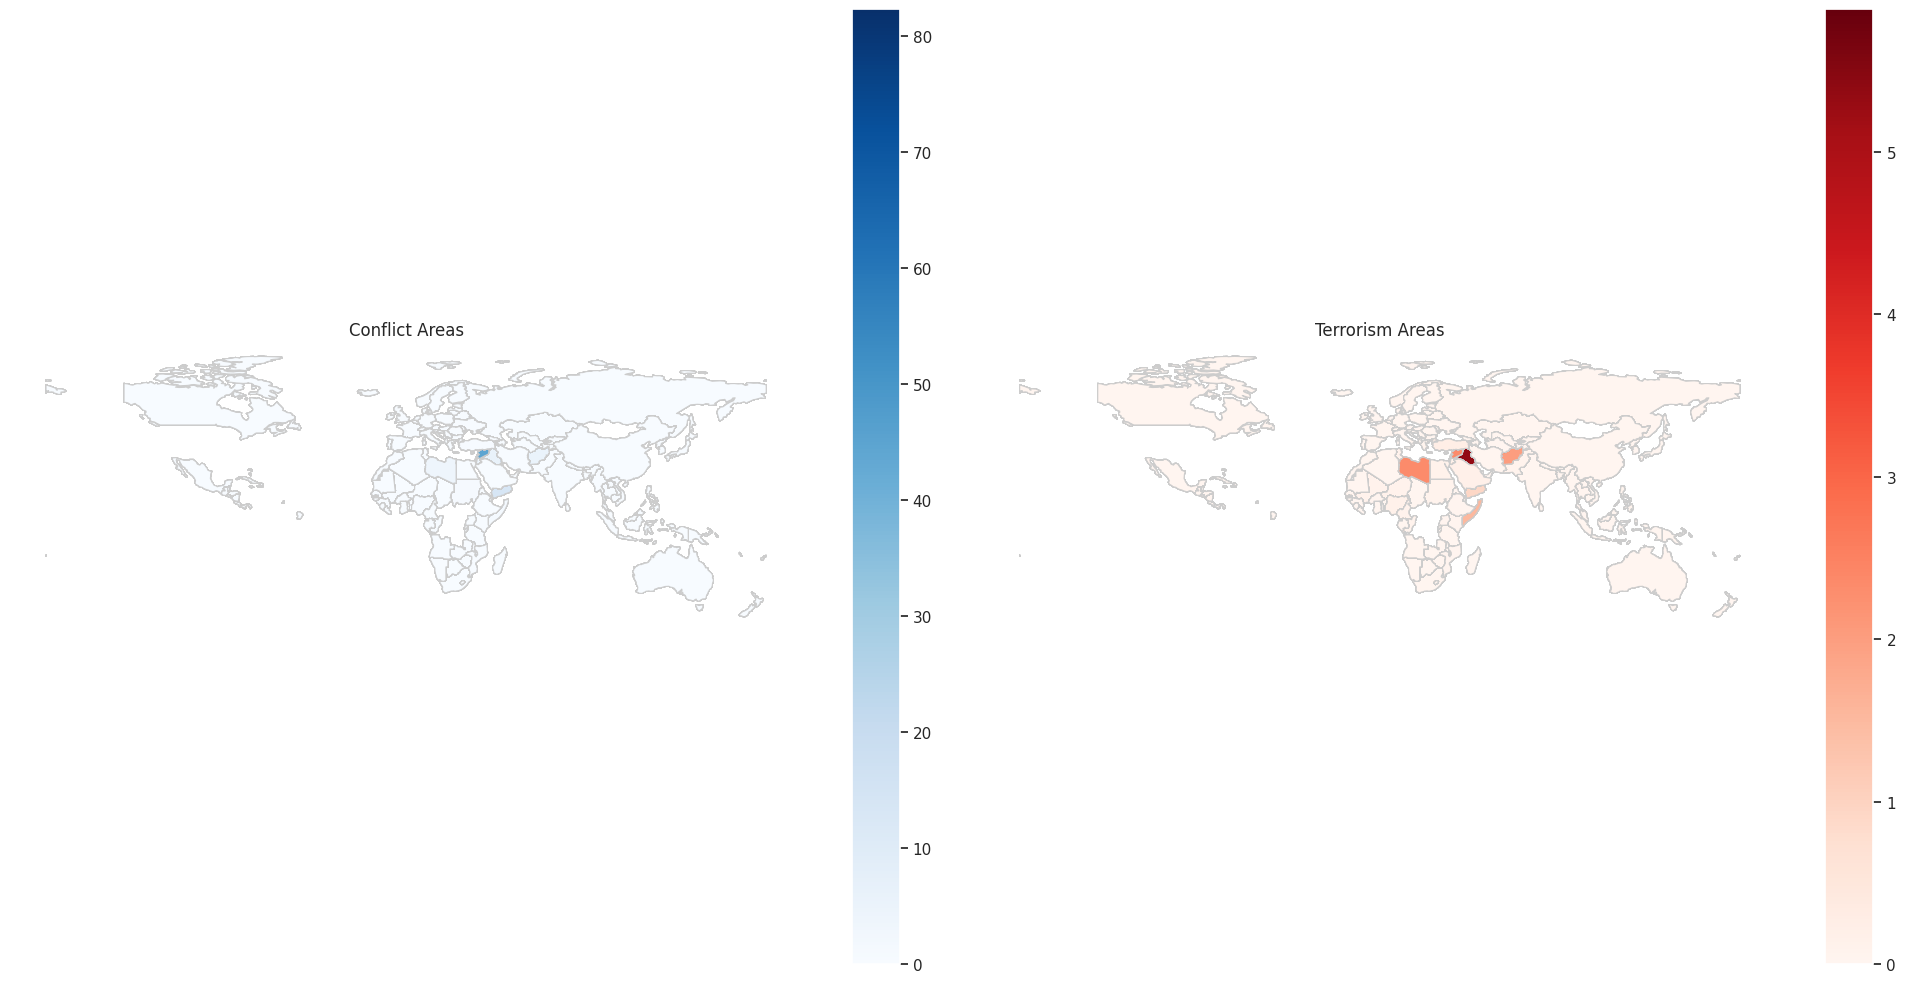

In [ ]:
# Load the world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Create a DataFrame from continent mapping
continent_df = pd.DataFrame(continent_mapping.items(), columns=['Continent', 'Countries'])

# Merge the continent mapping DataFrame with conflict and terrorism rates DataFrame
merged_df = pd.merge(continent_df.explode('Countries'), df[['Entity', 'Conflict (percent)', 'Terrorism (percent)']], left_on='Countries', right_on='Entity', how='left')

# Merge with the world map data
world = world.merge(merged_df, left_on='name', right_on='Countries', how='left')

# Plotting the map
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot conflict areas
world.plot(column='Conflict (percent)', cmap='Blues', linewidth=0.8, ax=ax[0], edgecolor='0.8', legend=True)
ax[0].set_title('Conflict Areas')
ax[0].axis('off')

# Plot terrorism areas
world.plot(column='Terrorism (percent)', cmap='Reds', linewidth=0.8, ax=ax[1], edgecolor='0.8', legend=True)
ax[1].set_title('Terrorism Areas')
ax[1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Plot bubble chart
fig = px.scatter(continent_agg, x='Conflict (deaths)', y='Terrorism (deaths)', size='Conflict (deaths)', color='Continent', hover_name='Continent',
                 log_x=True, size_max=90, title='Conflict vs Terrorism Deaths by Continent')

fig.update_layout(xaxis_title='Conflict (deaths)', yaxis_title='Terrorism (deaths)')
fig.show()

In [ ]:
fig = px.box(continent_agg, x='Continent', y='Conflict (deaths)', title='Conflict-related Deaths by Continent')
fig.show()


In [ ]:
fig = px.box(continent_agg, x='Continent', y='Terrorism (deaths)', title='Terrorism-related Deaths by Continent')
fig.show()